<a href="https://colab.research.google.com/github/fabianandrade/Introduction_to_data_science/blob/main/Introduction_to_Data_Sciente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória de dados com Python (Pandas / Seaborn)

In [ ]:
import pandas as pd

In [ ]:
notas=pd.read_csv('ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.shape

(100836, 4)

In [ ]:
notas.columns='usuarioId', 'filmeId', 'nota', 'momento'
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [ ]:
print('media',notas['nota'].mean())
print('mediana',notas['nota'].median())

media 3.501556983616962
mediana 3.5


In [ ]:
notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [ ]:
# Gráfico tipo histograma das notas, aplicando o argumento kind + descrições dos dados de nota:

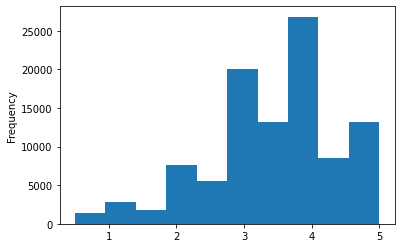

In [ ]:
notas.nota.plot(kind='hist')

In [ ]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

In [ ]:
# Importar o Seaborn, para mostrar a imagem na tela, e atribuir notas.nota para a função boxplot():

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


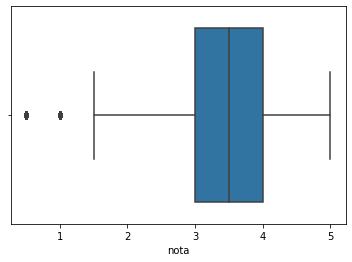

In [ ]:
sns.boxplot(notas.nota)

#Analisando os filmes

In [ ]:
filmes=pd.read_csv('movies.csv')
filmes.columns=['filmeID', 'titulo', 'generos']
filmes.head()

,filmeID,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#Analisando algumas a média de notas por filme

In [ ]:
# Média do filme 1 e do filme 2:

notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [ ]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [ ]:
medias_por_filme= notas.groupby('filmeId').mean()['nota']
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

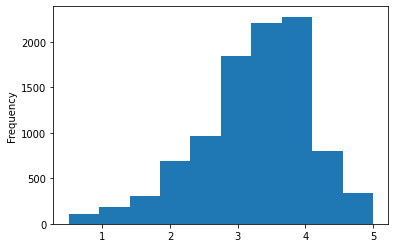

In [ ]:
medias_por_filme.plot(kind='hist')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))

<Figure size 360x576 with 0 Axes>

<Figure size 360x576 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


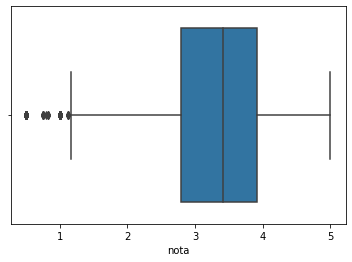

In [ ]:
sns.boxplot(medias_por_filme)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


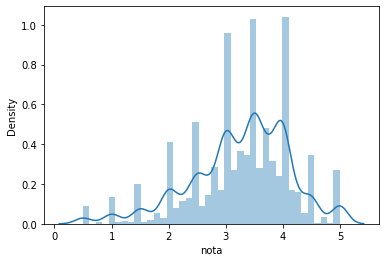

In [ ]:
sns.distplot(medias_por_filme, bins=40)

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <a list of 10 Patch objects>)

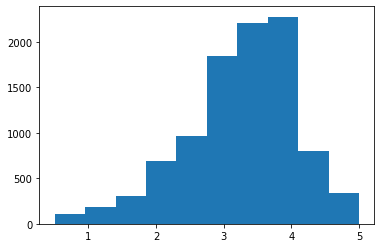

In [ ]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)

#Visualizando gráficos por categoria

In [ ]:
tmdb=pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb.original_language.unique()      #categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
#categorica ordinal

primeiro grau
segundo grau
terceiro grau

In [ ]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [ ]:
contagem_de_lingua=tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns=['original_language','total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


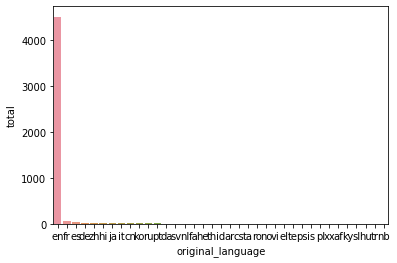

In [ ]:
sns.barplot(x='original_language',y='total',data=contagem_de_lingua)

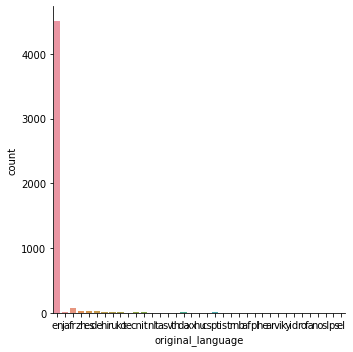

In [ ]:
sns.catplot(x='original_language',kind='count', data=tmdb)

# Passando uma mensagem através de visualização

In [ ]:
plt.pie(contagem_de_lingua['total'], labels=contagem_de_lingua['original_language'])

In [73]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral=total_por_lingua.sum()
total_de_ingles=total_por_lingua.loc['en']
total_do_resto=total_geral - total_de_ingles



In [ ]:
print(total_de_ingles,total_do_resto)

In [76]:
dados={
     'lingua': ['ingles','outros'],
     'total': [total_de_ingles,total_do_resto]
}
dados

{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [77]:
pd.DataFrame(dados)

,lingua,total
0,ingles,4505
1,outros,298


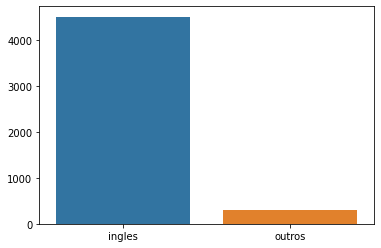

In [78]:
sns.barplot(x='lingua', y='total', data=dados)

#Visualizando as outras categorias


([<matplotlib.patches.Wedge at 0x7f08d87982d0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

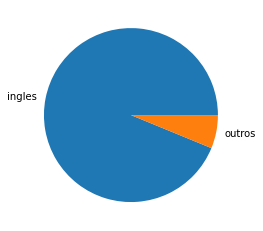

In [79]:
plt.pie(dados['total'],labels=dados['lingua'])

In [87]:
total_por_lingua_de_outros_filmes= tmdb.query("original_language != 'en'").original_language.value_counts()

In [88]:
total_por_lingua_de_outros_filmes=tmdb.query("original_language != 'en'")

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
nl     4
fa     4
th     3
he     3
ta     2
ar     2
ro     2
cs     2
id     2
pl     1
hu     1
el     1
vi     1
no     1
af     1
ps     1
sl     1
ky     1
te     1
is     1
tr     1
nb     1
xx     1
Name: original_language, dtype: int64

<Figure size 360x720 with 0 Axes>

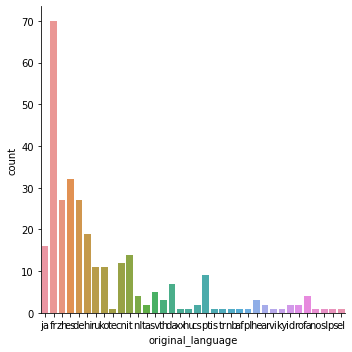

In [99]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
plt.figure(figsize=(5,10))

sns.catplot(x='original_language', kind='count',
            data=filmes_sem_lingua_original_em_ingles)

<Figure size 360x720 with 0 Axes>

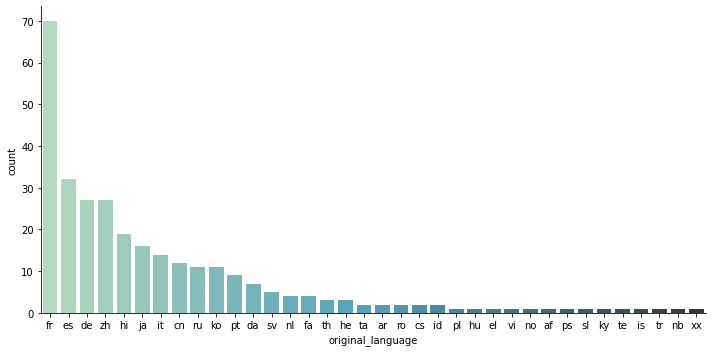

In [101]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
plt.figure(figsize=(5,10))

sns.catplot(x='original_language', kind='count',
            data=filmes_sem_lingua_original_em_ingles,
            palette="GnBu_d",
            aspect=2,        
            order=total_por_lingua_de_outros_filmes.index)

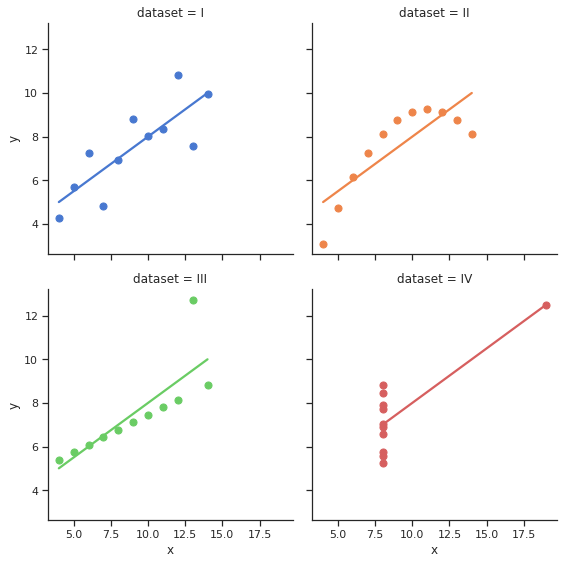

In [102]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})